In [12]:
import pandas as pd
import numpy as np 
#import random

import nltk
#from nltk.corpus import brown

from nltk.tokenize import word_tokenize
#from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.regexp import regexp_tokenize

from nltk.corpus import stopwords

#from pattern.text.en import singularize

#from nltk.stem.porter import PorterStemmer ##older
from nltk.stem import SnowballStemmer ##newer
from nltk.stem.wordnet import WordNetLemmatizer

In [13]:
import os

path = "C:/Users/Ranja.Sarkar/Desktop/ReadableReports/new4"
docs = os.listdir(path)
#docs[0]
##for index, i in  enumerate(docs):
##        print(index, i)

In [14]:
# remove punctuations from all docs 

import PyPDF2
import string

exclude = set(string.punctuation)
alldocslist = []

for index, i in  enumerate(docs):
    doctext = []
    if i.endswith(".pdf"):
        in_file = os.path.abspath(path + "\\" + i)
        in_file1 = in_file.encode('UTF-8')
        pdfileobject = open(in_file1,'rb')
        pdfreader = PyPDF2.PdfFileReader(pdfileobject)   
        count = pdfreader.numPages
        for j in range(count):
            page = pdfreader.getPage(j)
            pp = page.extractText()
            doctext.append(pp)
        doctext = ''.join(ch for ch in doctext if ch not in exclude)
                             
        alldocslist.append(doctext)  

In [ ]:
#doctext[1]

In [4]:
# tokenize words in all docs

plot_data = [[]] * len(alldocslist)
#plot_data

for doc in alldocslist:
    doctext = doc
#    tokentext = word_tokenize(doctext)
    tokentext = regexp_tokenize(doctext, pattern = '\s+', gaps = True)
    plot_data[index].append(tokentext)


In [5]:
#make all words lowercase 

for x in range(len(docs)):
    lowers = [word.lower() for word in plot_data[0][x]]
    plot_data[0][x] = lowers

In [ ]:
# remove stop words from all docs and lemmatize

stop_words = set(stopwords.words('english'))

#porter_stemmer = PorterStemmer()
#snowball_stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

for x in range(len(docs)):
    filtered_doc = [w for w in plot_data[0][x] if not w in stop_words]
#    singular_filtered_doc = [singularize(w) for w in filtered_doc]
#    stemmed_doc = [snowball_stemmer.stem(w) for w in filtered_doc] 
    lem_doc = [lemmatizer.lemmatize(w) for w in filtered_doc]
    plot_data[0][x] = lem_doc
    
#    stemmed_doc = [porter_stemmer.stem(w) for w in filtered_doc]
#    plot_data[0][x] = stemmed_doc

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import ImageColorGenerator

#char_mask = np.array(Image.open("C:/Users/Ranja.Sarkar/Desktop/b1.png"))
#image_colors = ImageColorGenerator(char_mask)
                                
#wc = WordCloud(background_color = "white", max_words = 1000, width = 400, height = 400, mask = char_mask, random_state = 1).generate(doctext)
wc = WordCloud(background_color = "white", max_words = 1000, width = 400, height = 400, random_state = 1).generate(doctext)

#wc = WordCloud(background_color = "gray", max_words = 1000, random_state = 1).generate(doctext)

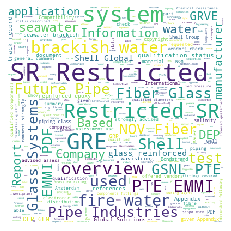

In [16]:
## TF (word cloud) is good for text similarity, in general

plt.imshow(wc)
plt.axis('off')
#plt.imshow(wc.recolor(color_func = image_colors))
plt.savefig('wc.png', figsize = (1200, 600), dpi = 300)